In [1]:
import wheelimu as whi
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
imu = whi.IMU(
    offs=(0.1, 0.0, 0.0),
    sampleRate=100.0, # 100 Hz
    gyroMax=np.deg2rad(200.0), # +-200 deg/s
    accMax=whi.gravity * 2.0,  # +-2g
    gyroResolution=16, # 16 bit signed ADC
    accResolution=16,
    gyroRMS=0.01, # some noise to make it look realistic
    accRMS=0.01
)

# rotate by -90 degrees around x axis when using turntable in horizontal direction
rot = np.array([
    (1, 0, 0),
    (0, 0, -1),
    (0, 1, 0)
])

n = 10000
dt = 0.01
data = []
for k in range(n):
    t = dt * k
    w, a = imu.sample(t, 
        wheelAngVelocity=np.deg2rad(100.0), # 100 deg/s
        robotAccel=(0, 0, 0),
        robotAngVelocity=(0, 0, 0),
        robotRotMatrix=rot
    )
    data.append({
        't': t,
        'wx': w[0],
        'wy': w[1],
        'wz': w[2],
        'ax': a[0],
        'ay': a[1],
        'az': a[2]
    })
    
df = pd.DataFrame(data)

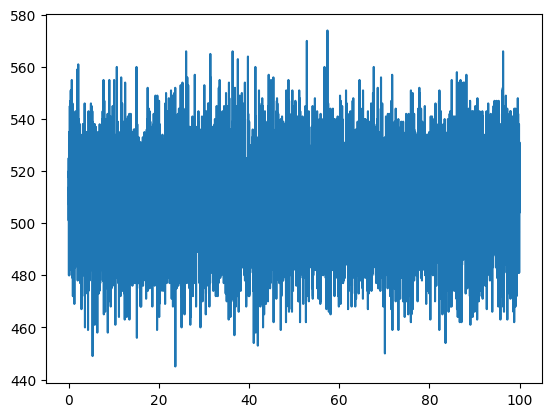

In [4]:
plt.plot(df['t'], df['ax'])